In [1]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams.update({'figure.max_open_warning': 0,
                 'font.size': 14,
                 'axes.titlesize': 14,
                 'axes.labelsize': 14,
                 'axes.grid':True,
                 'xtick.direction': 'in',
                 'ytick.direction': 'in',
                 'ytick.right': True,
                 'xtick.top':True,                 
                 'ytick.major.size': 10,
                 'xtick.major.size': 10,
                 'legend.fancybox': True,
                 'legend.markerscale': 0.8,
                 'legend.handlelength': 5.0
                 #'axes.prop_cycle': cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),

                 
                 #'xtick.labelsize': 12,
                 #'ytick.labelsize': 12
                })

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

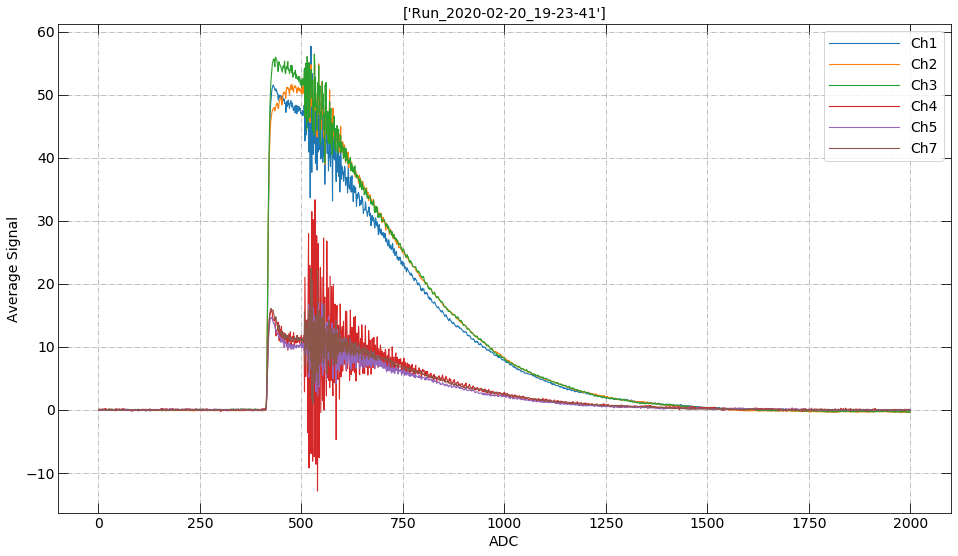

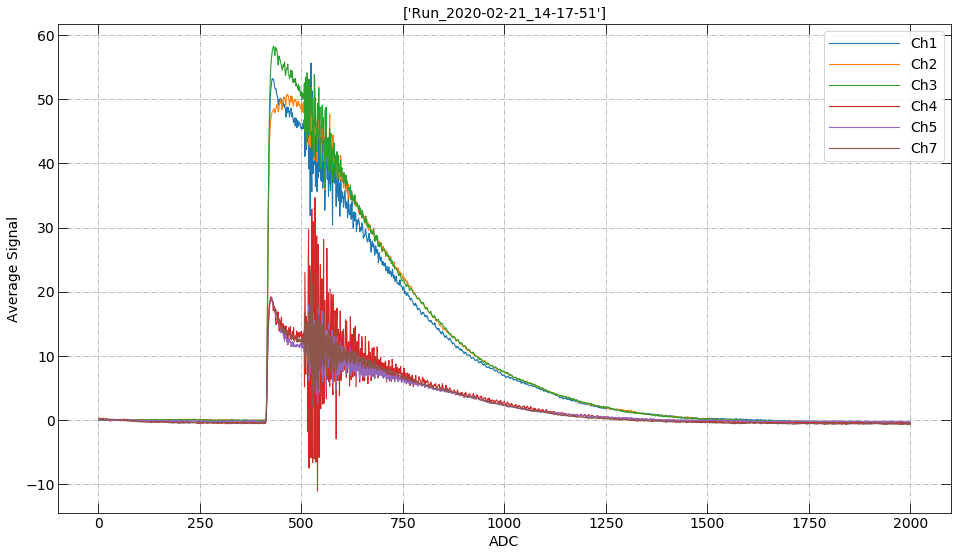

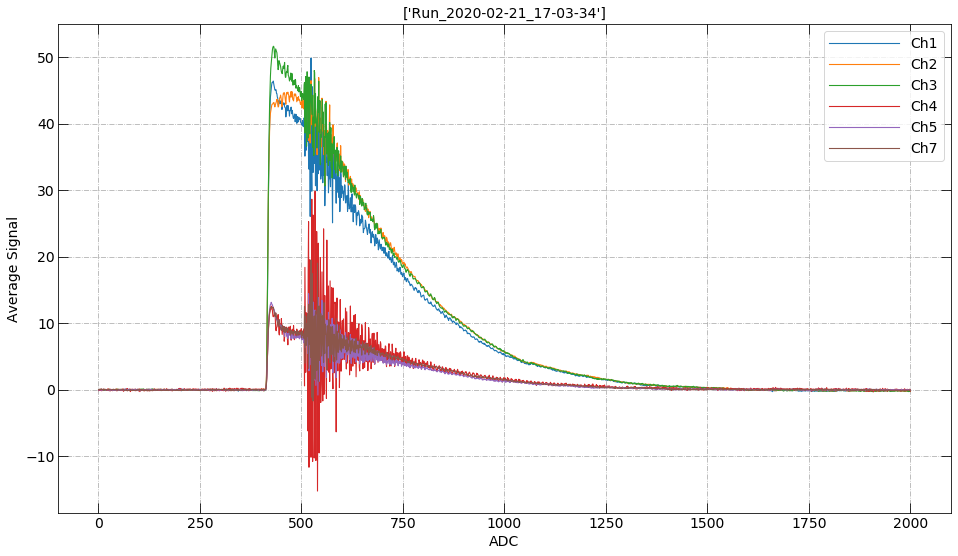

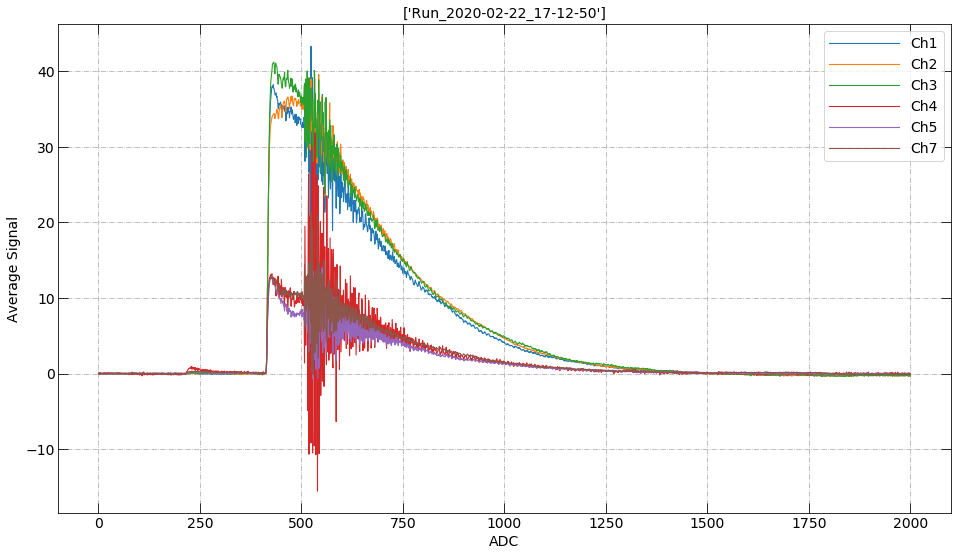

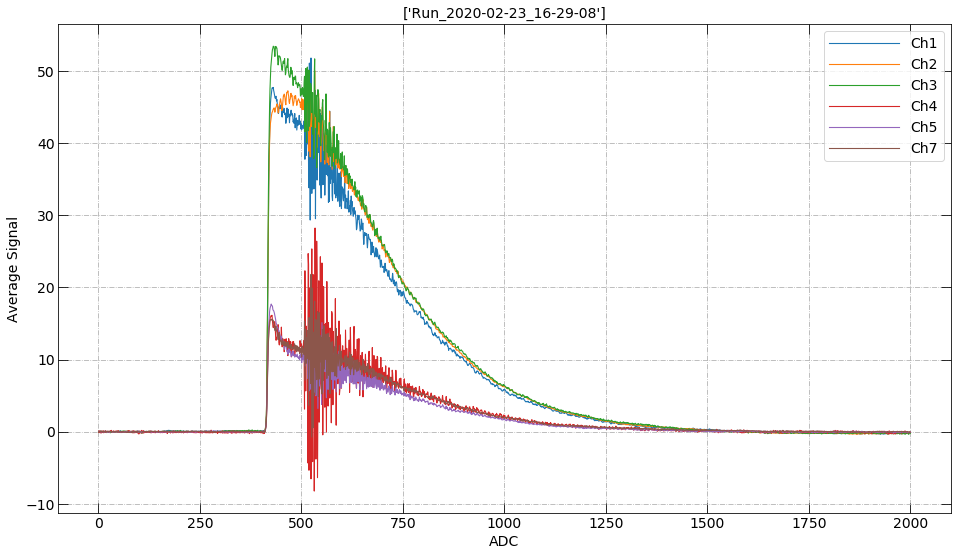

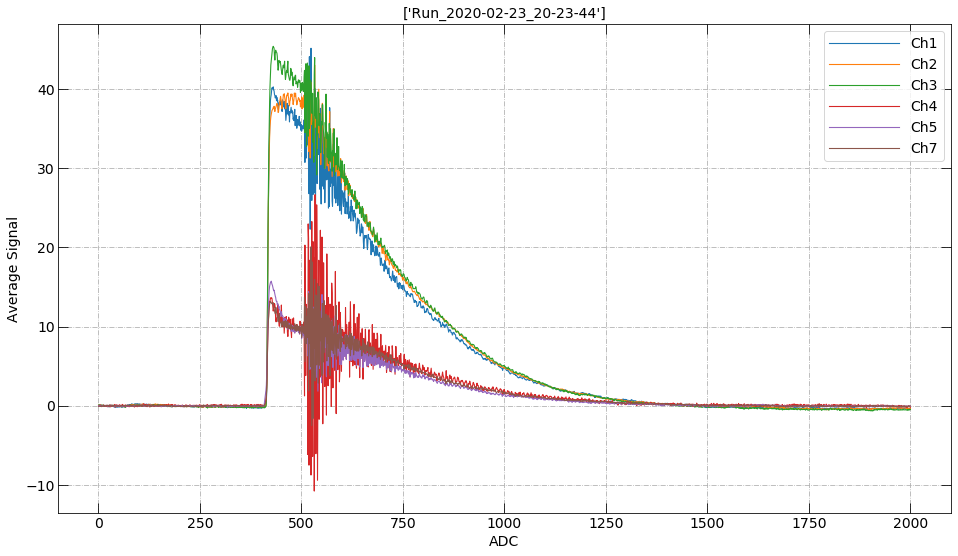

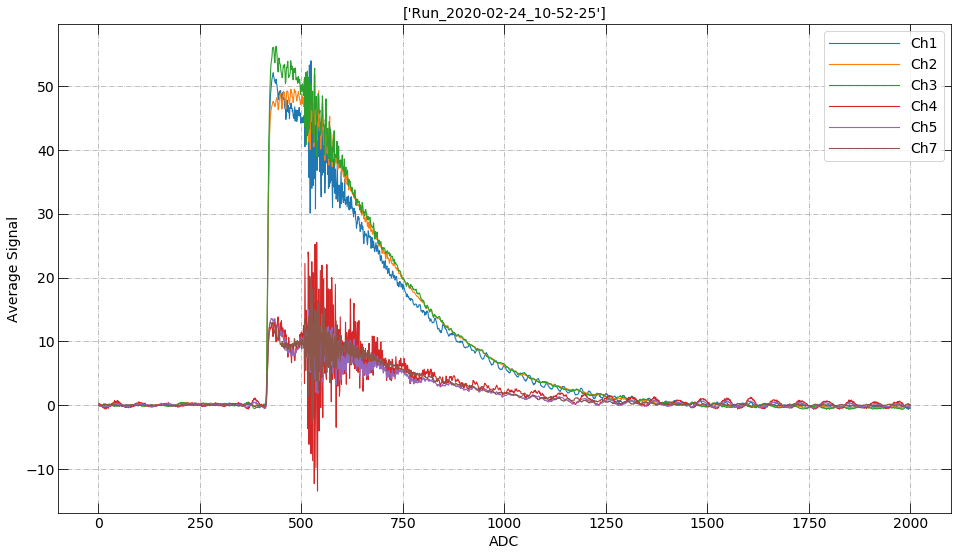

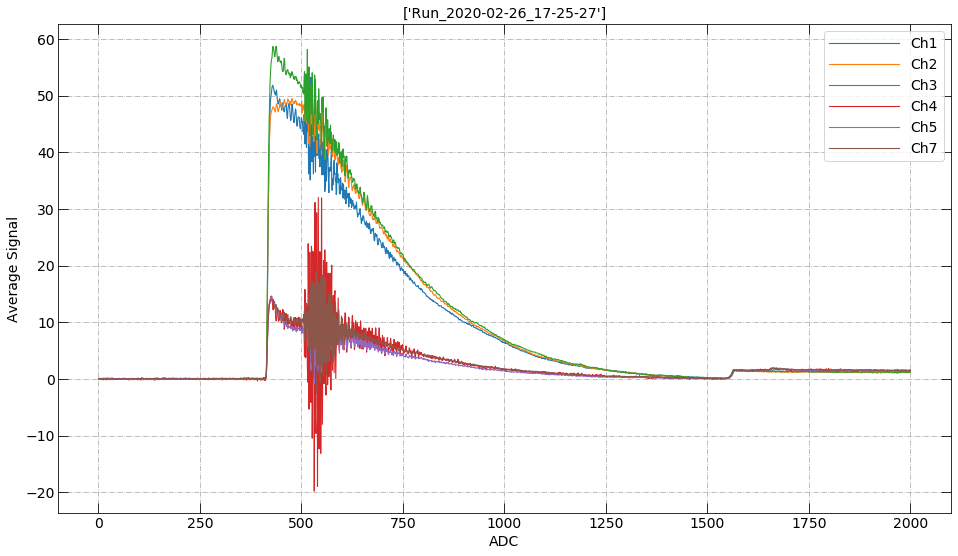

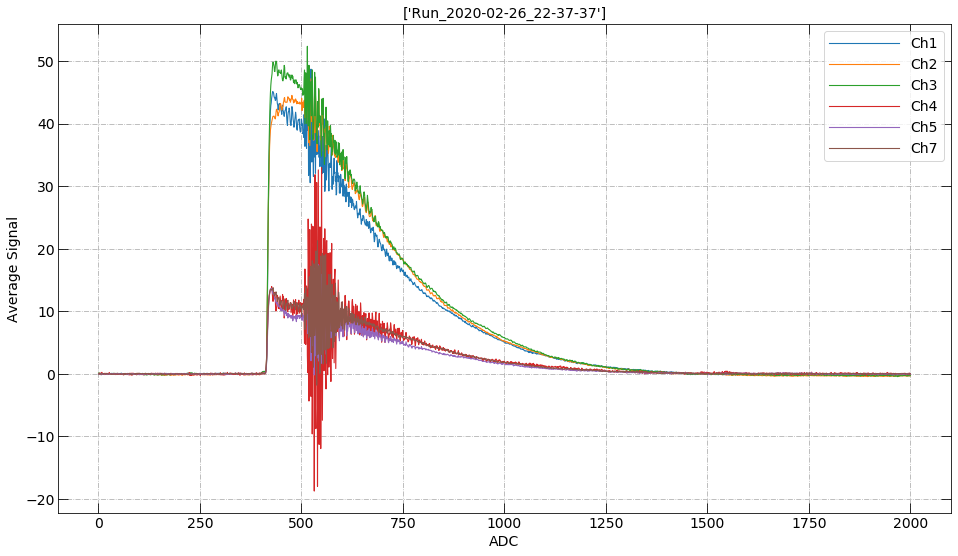

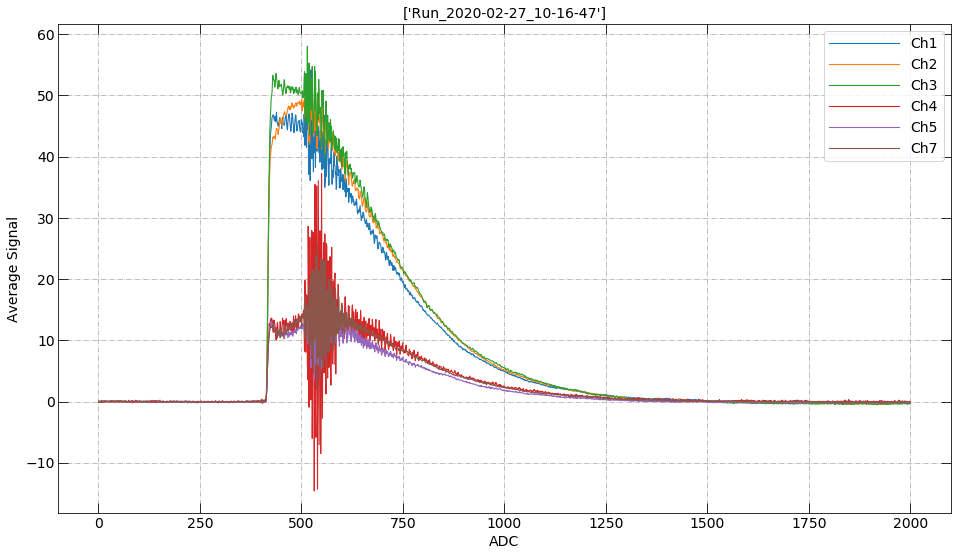

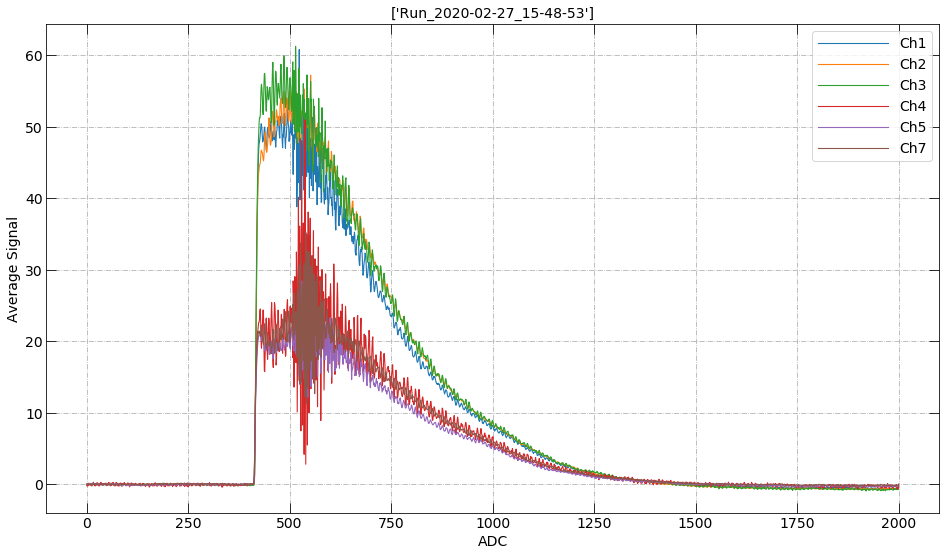

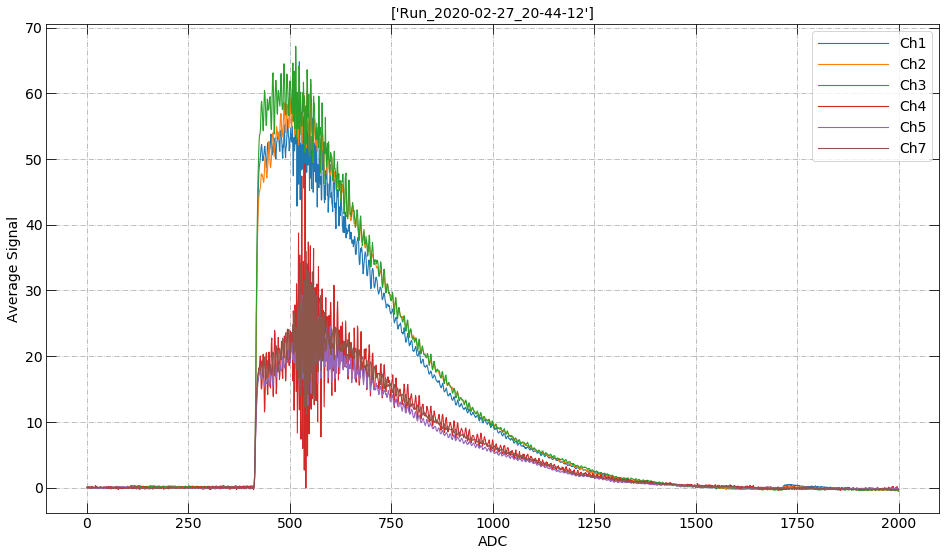

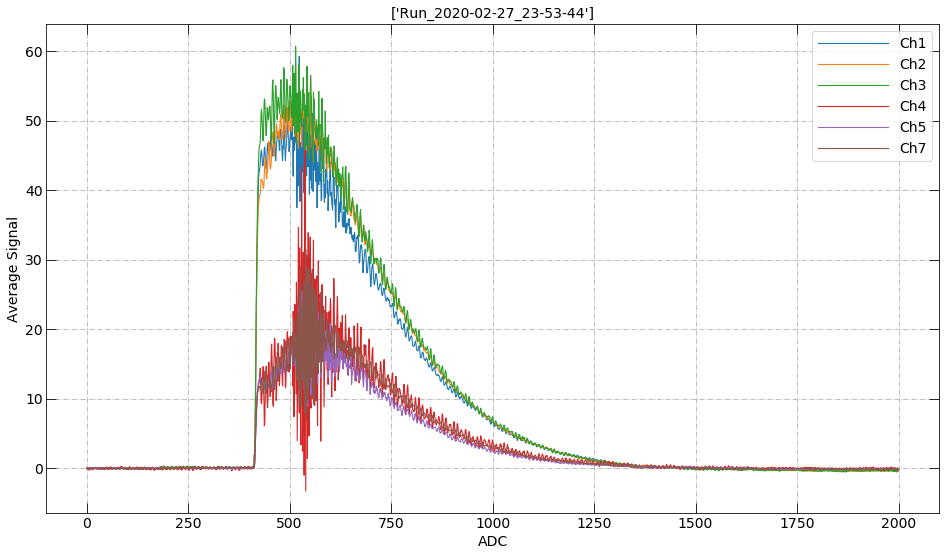

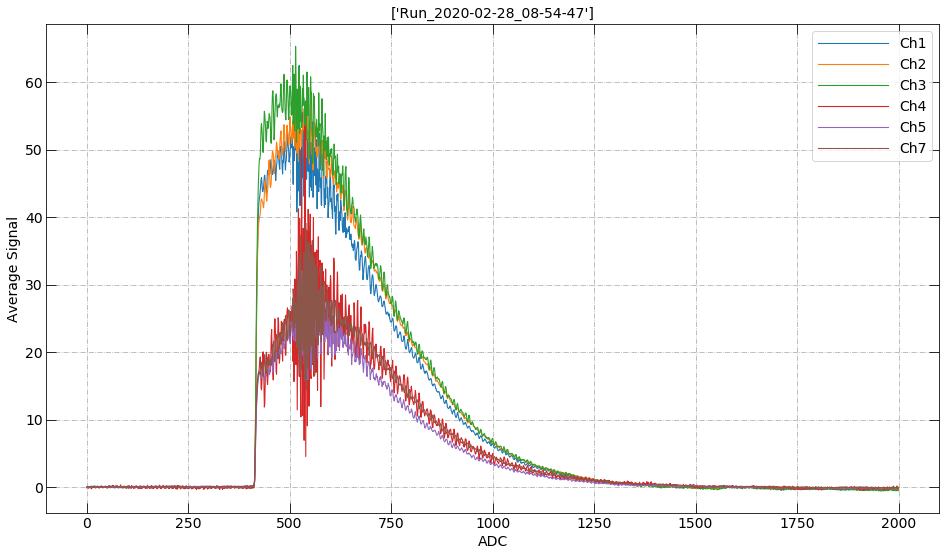

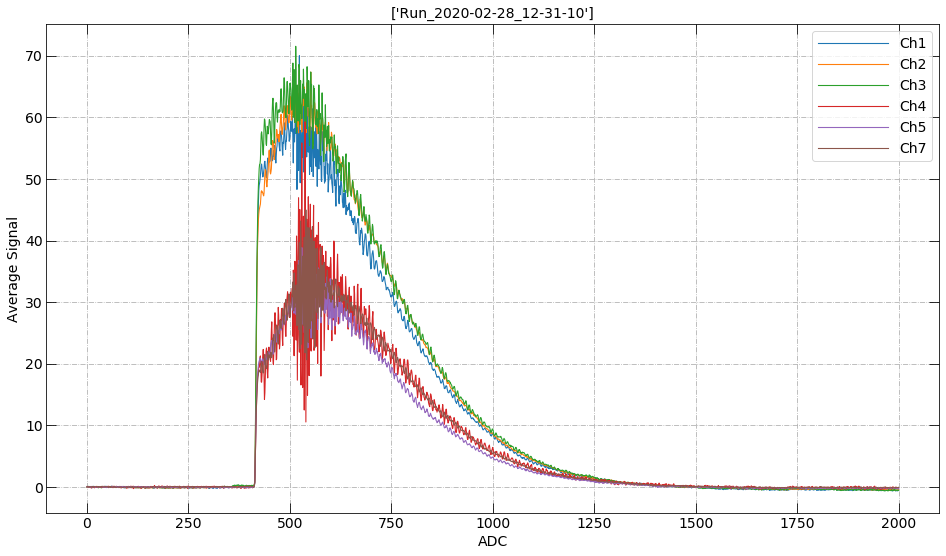

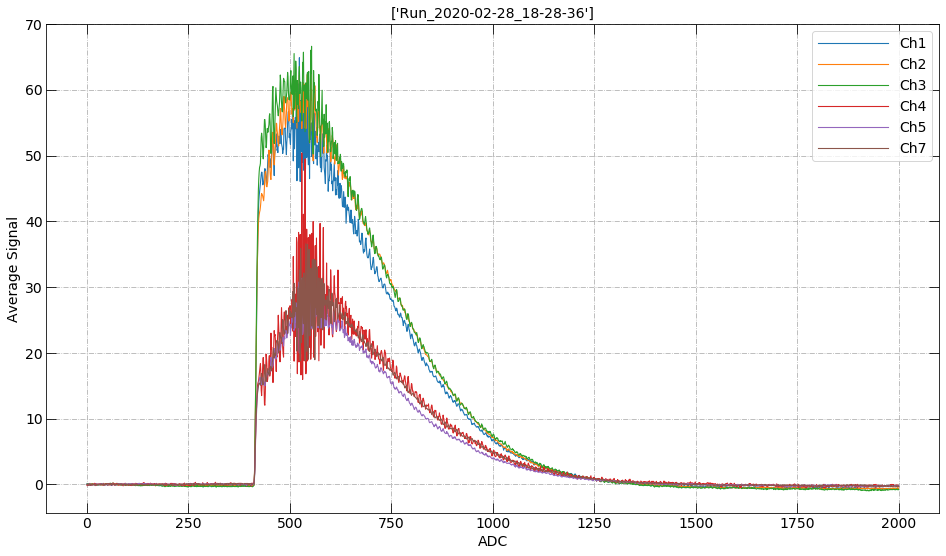

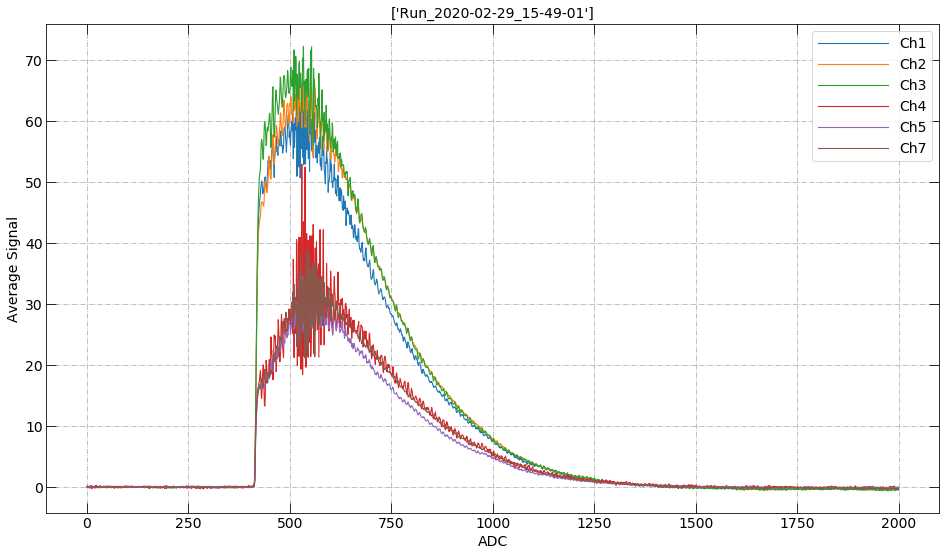

In [3]:
dirname = '/home/furkan/data/test_pods/'
Run = []
if not os.path.exists('run_by'):
    os.makedirs('run_by')

for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            #print(str(os.path.splitext(filename)[0]))
            Run = []
            Run: Run.append('Run_' +filename.split('.pkl')[0])
            #print(Run)
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            #pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            #mydata = pickle.load(pkl_file)

            dict_s ={}
            for key, value in mydata.items():
                #print(mydata[key].max(axis=0))
                channel=mydata[key]
                dict_s.update({key:channel})

            for key, value in dict_s.items():
                plt.plot(range(1, len(value) + 1), value, label=key, linewidth=1.1)
                # NOTE: changed `range(1, 4)` to mach actual values count
            plt.title(Run)
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plt.ticklabel_format(style='plain')
            #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
            plt.legend() 
            #plt.yscale('log')
            #plt.xlim(200, 600)
            #plt.ylim(0.0001, 0.1)
            #plt.xlim(300, 1500)

            plot_path = os.path.abspath('run_by') 
            plot_name = 'run_by'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()


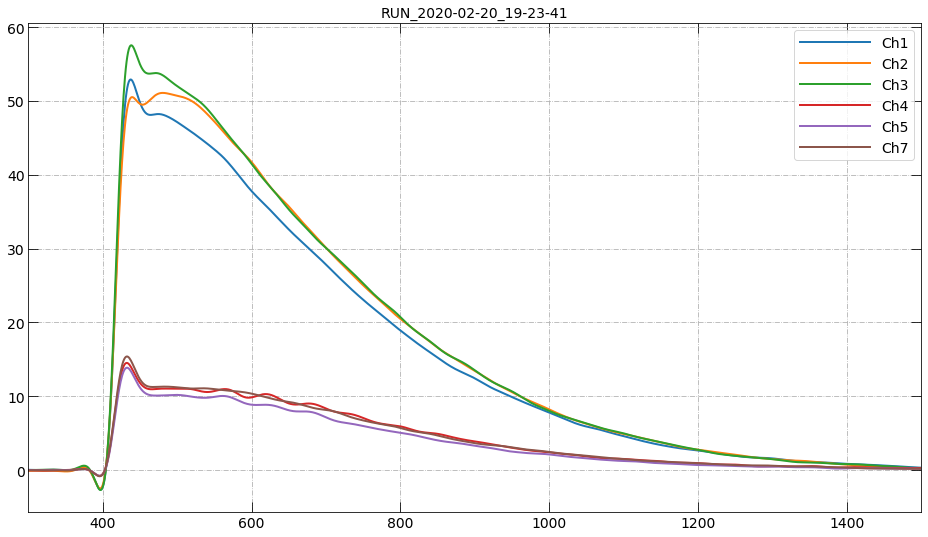

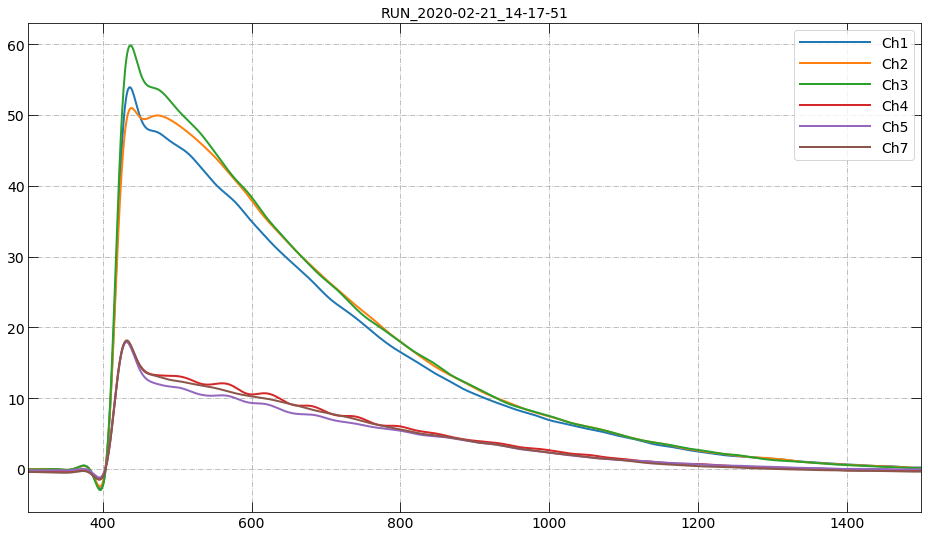

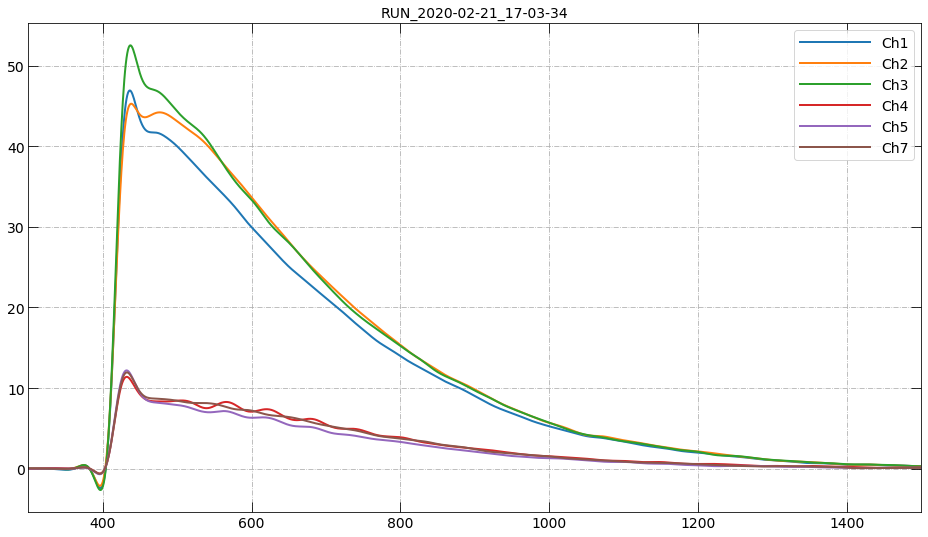

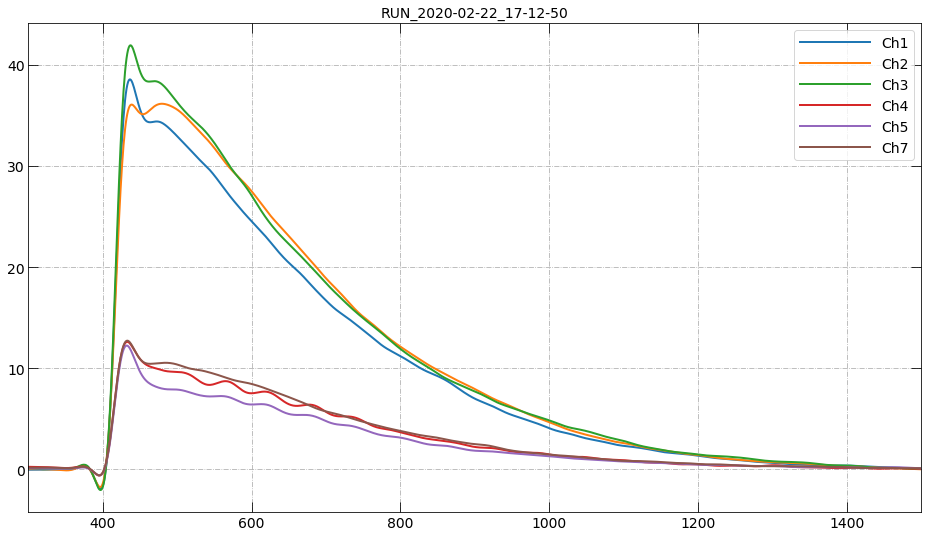

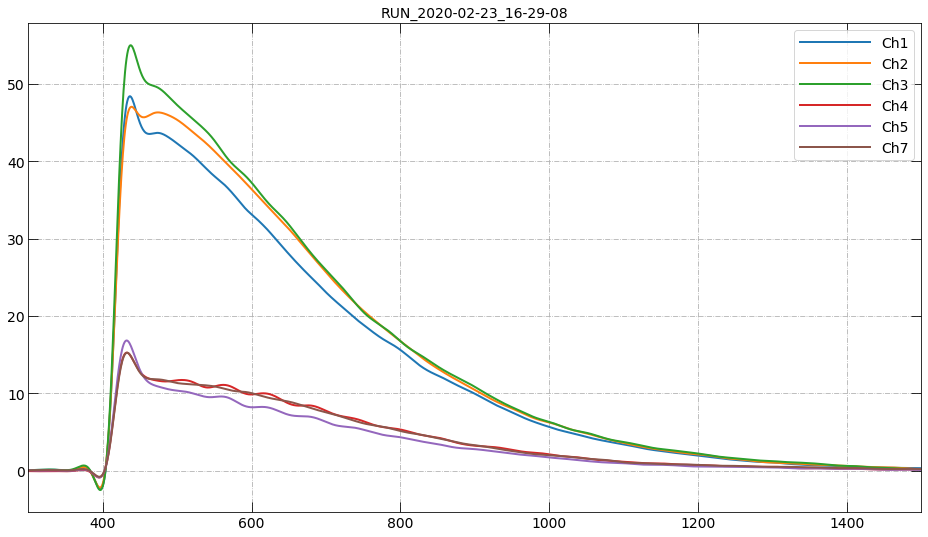

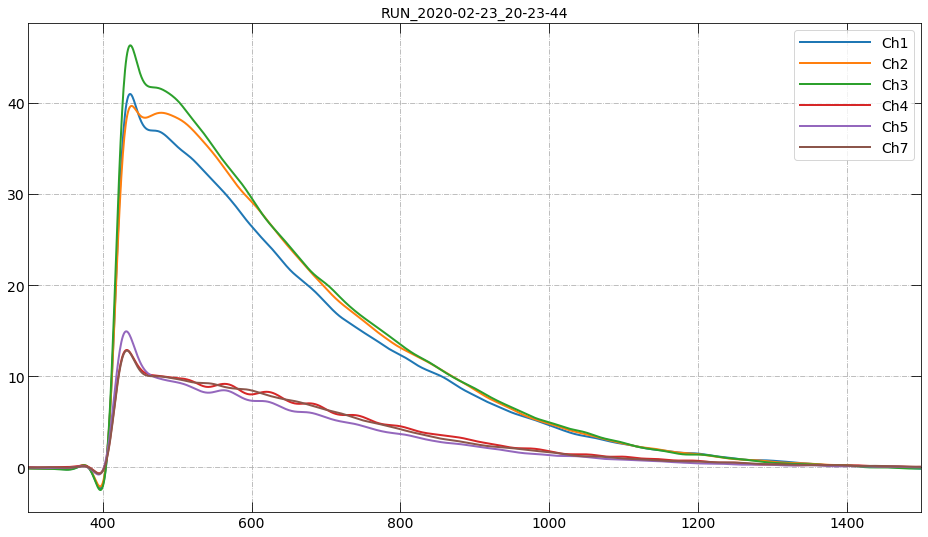

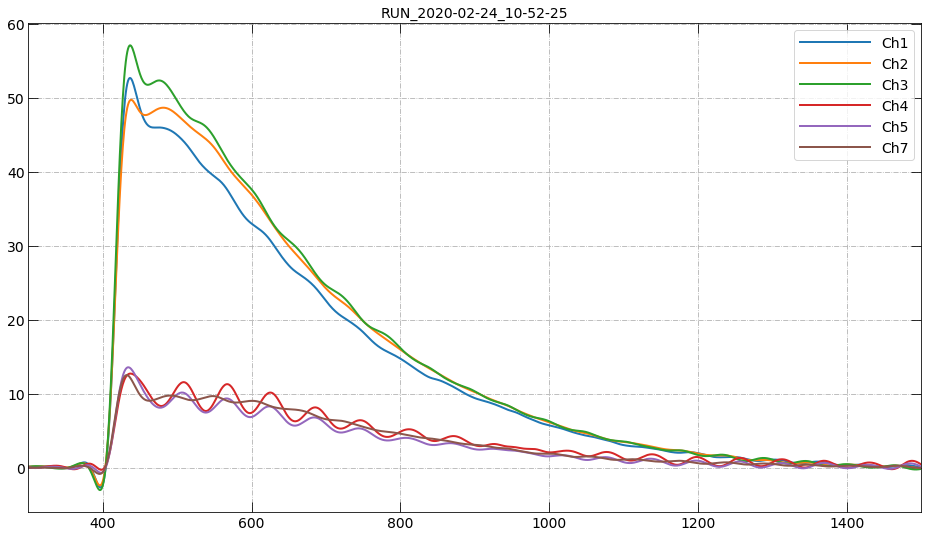

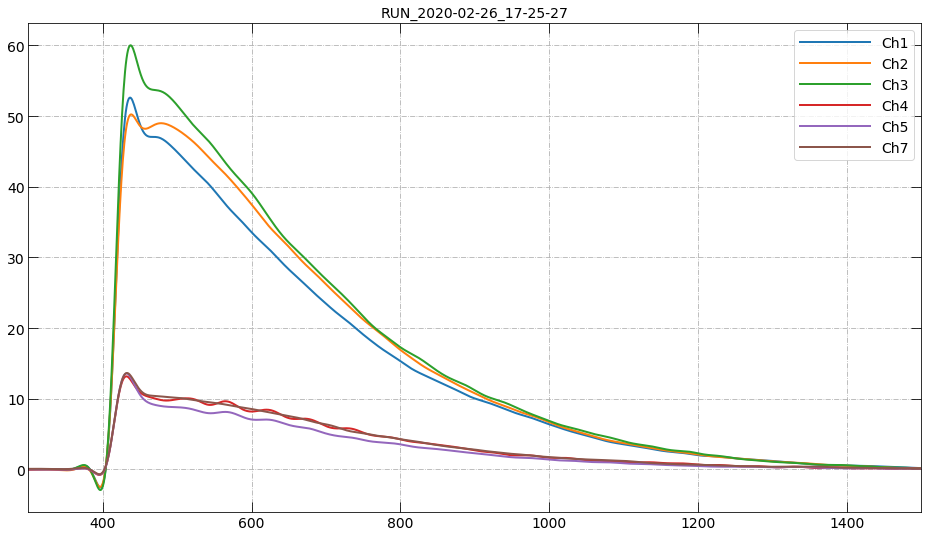

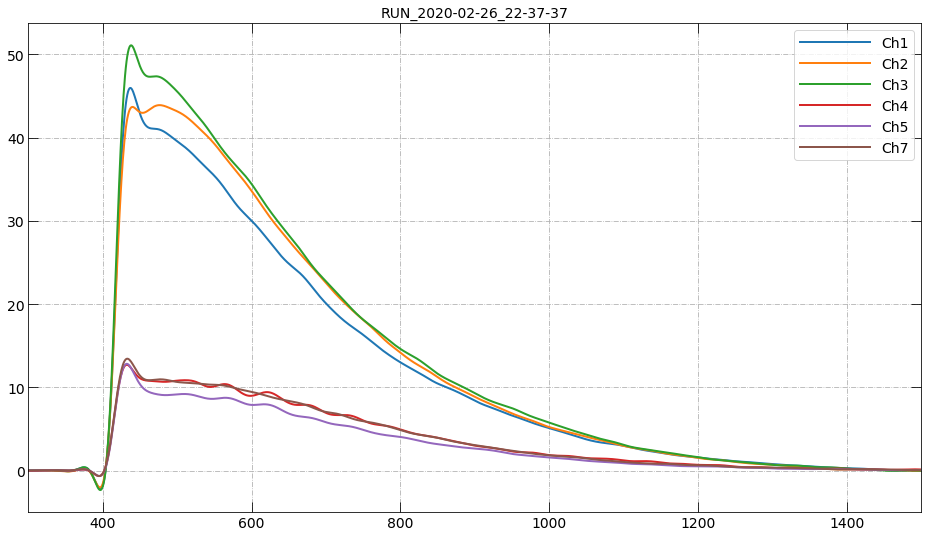

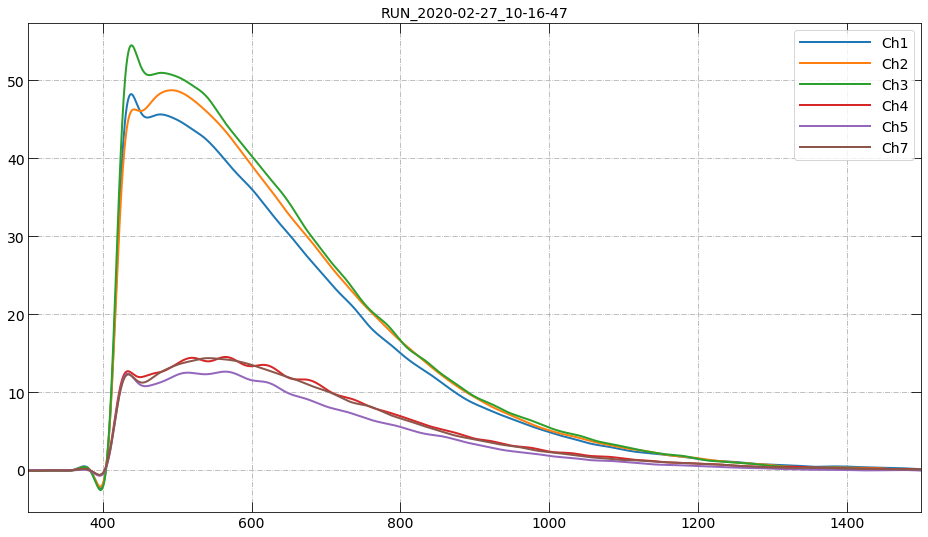

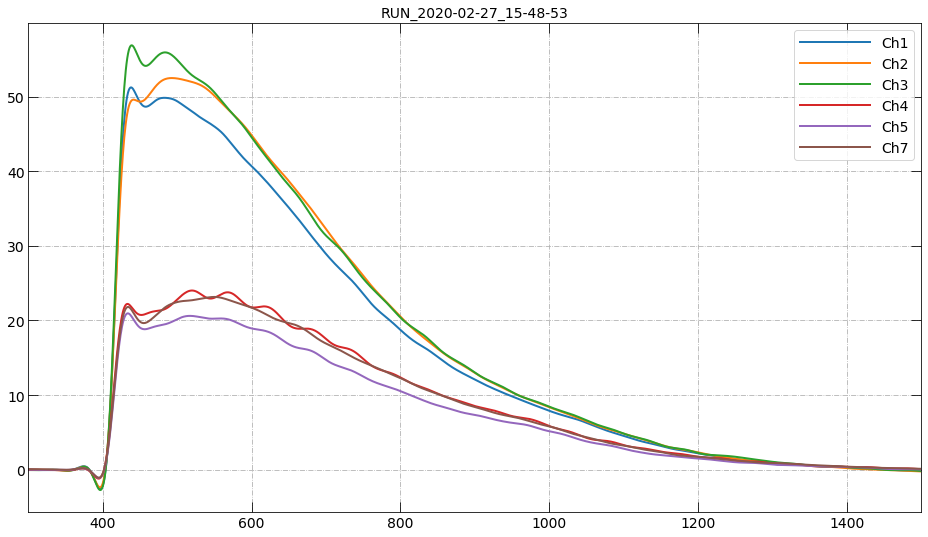

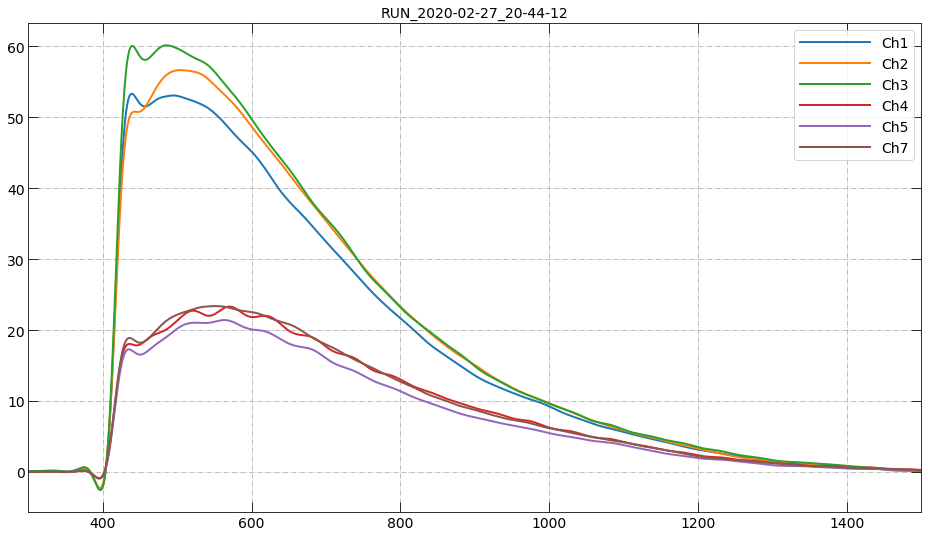

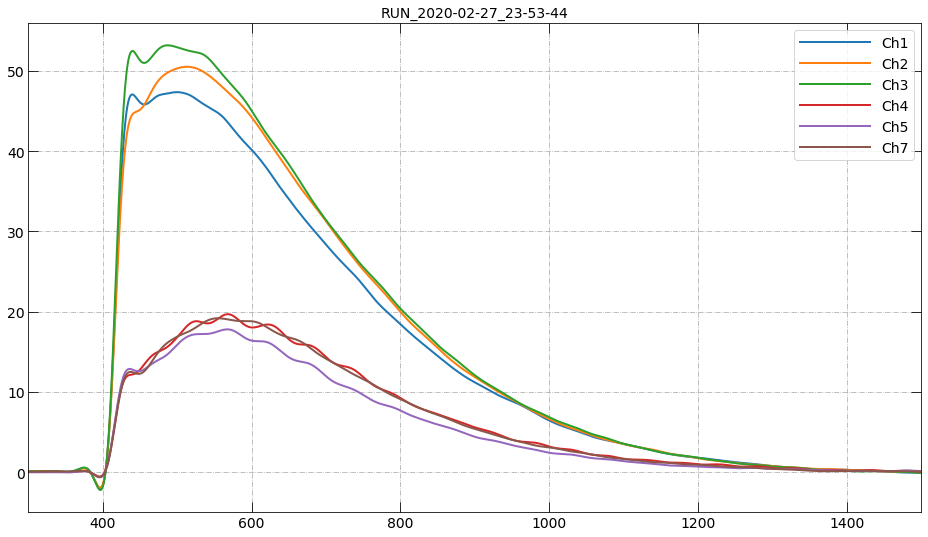

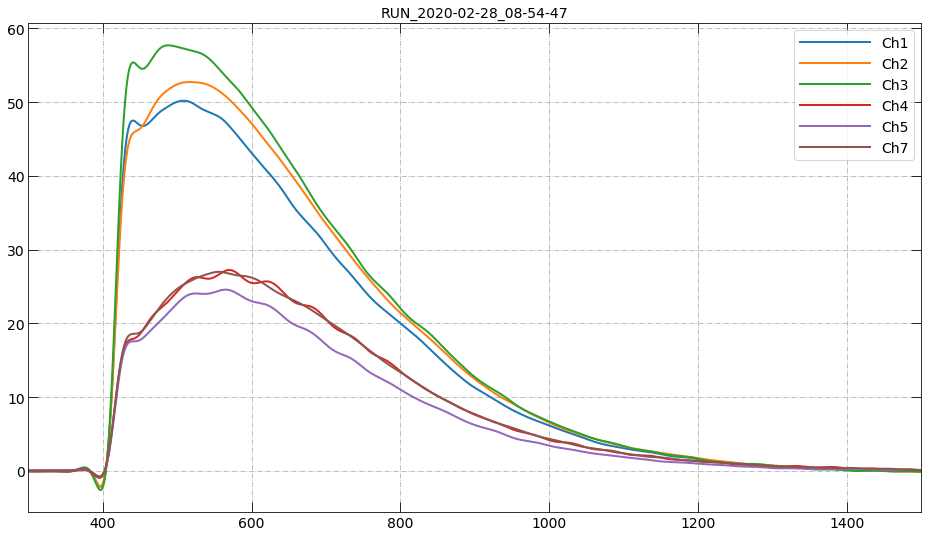

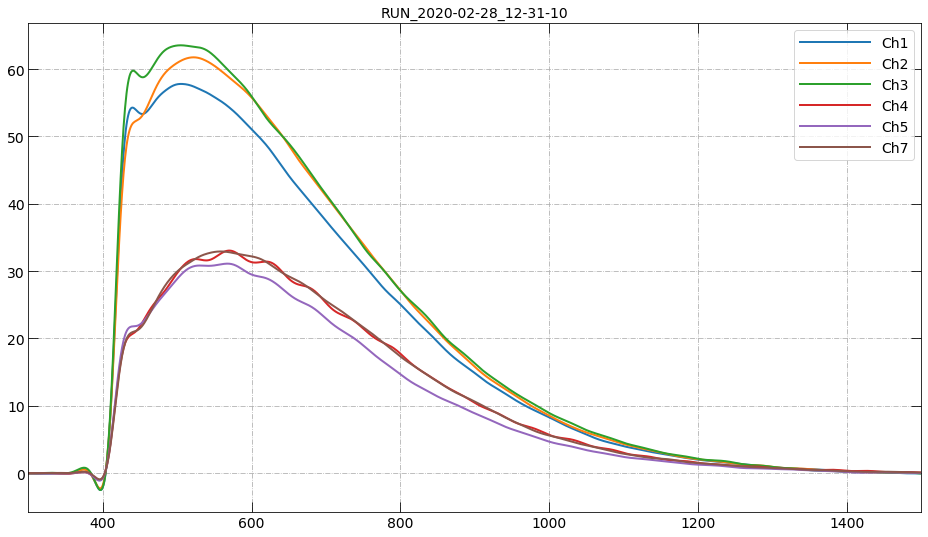

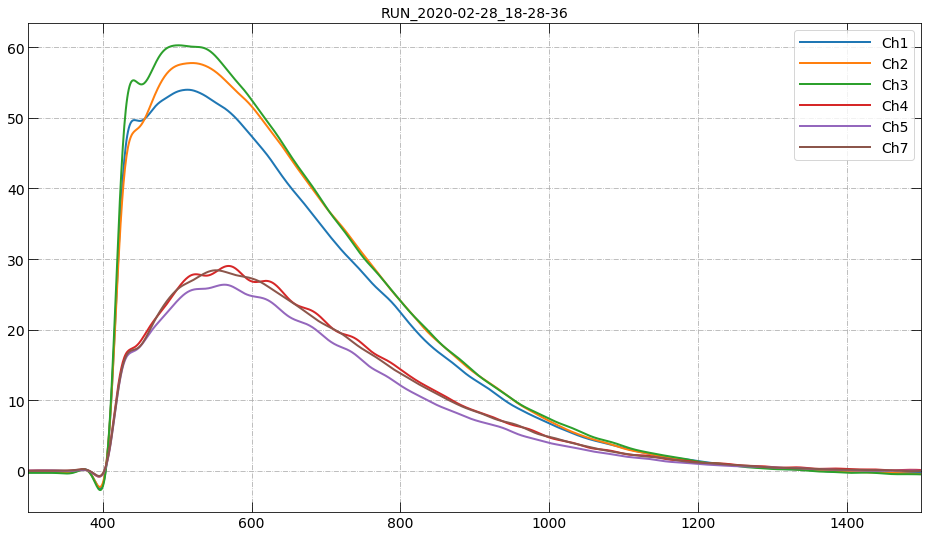

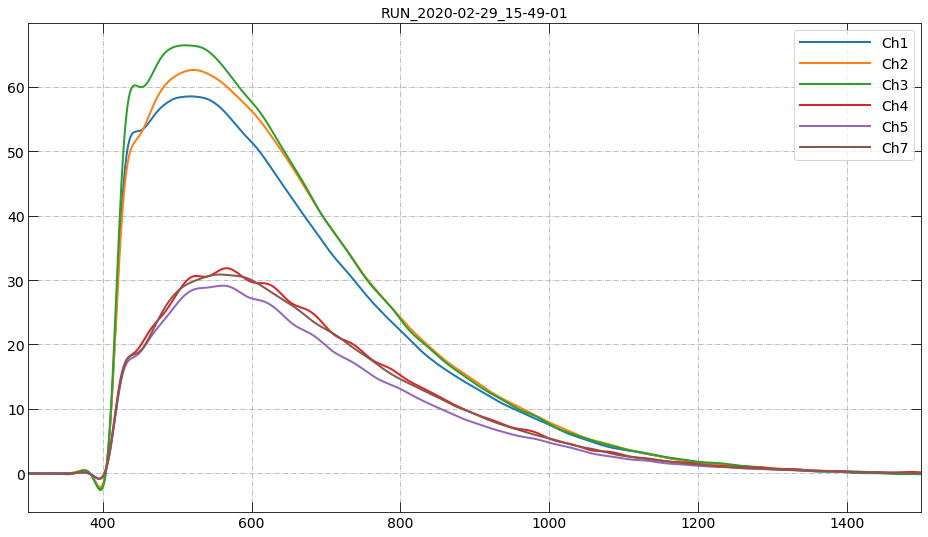

In [4]:
if not os.path.exists('run_filt'):
    os.makedirs('run_filt')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                zi = signal.lfilter_zi(b, a)
                z, _ = signal.lfilter(b, a, value, zi=zi*value[0])
                z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
                channel = signal.filtfilt(b, a, value)   

                dict_s.update({key:channel})

            for key, value in dict_s.items():
                xtime=range(1, len(value) + 1),
                plt.plot(value, label=key, linewidth=2)
            plt.title('RUN_'+str(os.path.splitext(filename)[0]))
            plt.grid(True)
            plt.legend() 
            plt.xlim(300, 1500)
            plot_path = os.path.abspath('run_filt') 
            plot_name = 'run_filt'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()    

2020-02-20_19-23-41.pkl :  16457
2020-02-21_14-17-51.pkl :  15310
2020-02-21_17-03-34.pkl :  13140
2020-02-22_17-12-50.pkl :  10674
2020-02-23_16-29-08.pkl :  14193
2020-02-23_20-23-44.pkl :  11536
2020-02-24_10-52-25.pkl :  14422
2020-02-26_17-25-27.pkl :  14733
2020-02-26_22-37-37.pkl :  12836
2020-02-27_10-16-47.pkl :  14652
2020-02-27_15-48-53.pkl :  16986
2020-02-27_20-44-12.pkl :  18659
2020-02-27_23-53-44.pkl :  16324
2020-02-28_08-54-47.pkl :  17216
2020-02-28_12-31-10.pkl :  20620
2020-02-28_18-28-36.pkl :  18840
2020-02-29_15-49-01.pkl :  19983


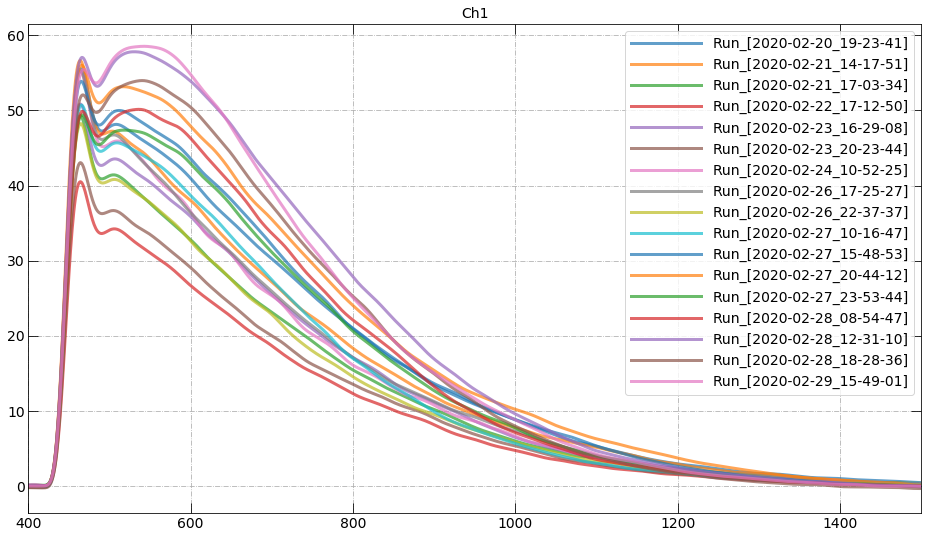

2020-02-20_19-23-41.pkl :  17604
2020-02-21_14-17-51.pkl :  16255
2020-02-21_17-03-34.pkl :  14230
2020-02-22_17-12-50.pkl :  11521
2020-02-23_16-29-08.pkl :  15231
2020-02-23_20-23-44.pkl :  12348
2020-02-24_10-52-25.pkl :  15365
2020-02-26_17-25-27.pkl :  15841
2020-02-26_22-37-37.pkl :  13849
2020-02-27_10-16-47.pkl :  15686
2020-02-27_15-48-53.pkl :  18230
2020-02-27_20-44-12.pkl :  19880
2020-02-27_23-53-44.pkl :  17398
2020-02-28_08-54-47.pkl :  18384
2020-02-28_12-31-10.pkl :  22016
2020-02-28_18-28-36.pkl :  20164
2020-02-29_15-49-01.pkl :  21439


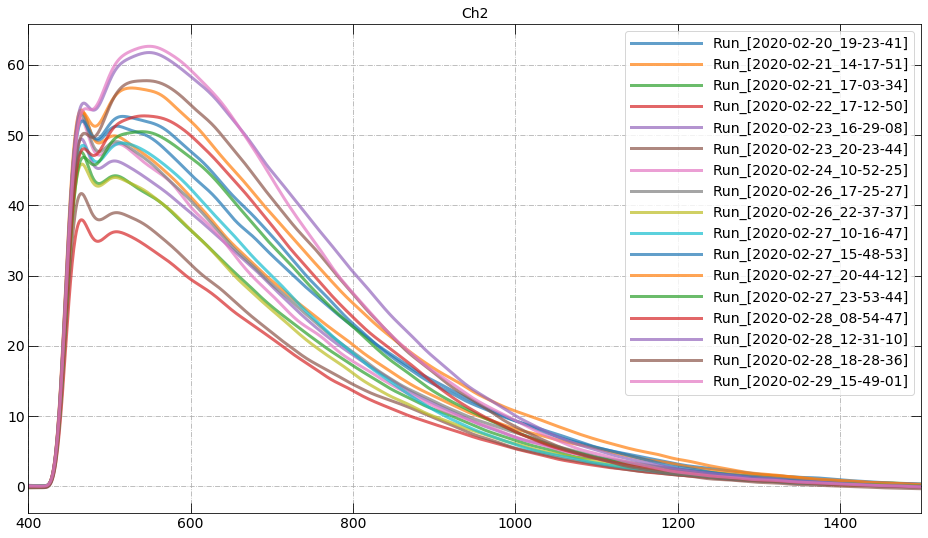

2020-02-20_19-23-41.pkl :  17996
2020-02-21_14-17-51.pkl :  16786
2020-02-21_17-03-34.pkl :  14508
2020-02-22_17-12-50.pkl :  11702
2020-02-23_16-29-08.pkl :  15856
2020-02-23_20-23-44.pkl :  12867
2020-02-24_10-52-25.pkl :  15973
2020-02-26_17-25-27.pkl :  16808
2020-02-26_22-37-37.pkl :  14521
2020-02-27_10-16-47.pkl :  16429
2020-02-27_15-48-53.pkl :  18615
2020-02-27_20-44-12.pkl :  20650
2020-02-27_23-53-44.pkl :  18156
2020-02-28_08-54-47.pkl :  19634
2020-02-28_12-31-10.pkl :  22656
2020-02-28_18-28-36.pkl :  20837
2020-02-29_15-49-01.pkl :  22253


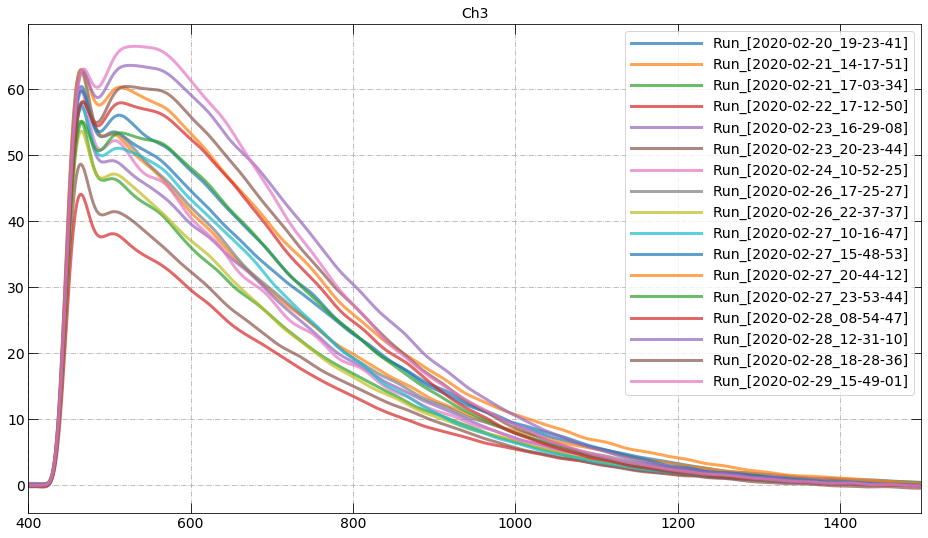

2020-02-20_19-23-41.pkl :  4510
2020-02-21_14-17-51.pkl :  4910
2020-02-21_17-03-34.pkl :  3188
2020-02-22_17-12-50.pkl :  3383
2020-02-23_16-29-08.pkl :  4393
2020-02-23_20-23-44.pkl :  3695
2020-02-24_10-52-25.pkl :  3876
2020-02-26_17-25-27.pkl :  3700
2020-02-26_22-37-37.pkl :  4043
2020-02-27_10-16-47.pkl :  5385
2020-02-27_15-48-53.pkl :  9373
2020-02-27_20-44-12.pkl :  9219
2020-02-27_23-53-44.pkl :  7021
2020-02-28_08-54-47.pkl :  9953
2020-02-28_12-31-10.pkl :  12365
2020-02-28_18-28-36.pkl :  10470
2020-02-29_15-49-01.pkl :  11360


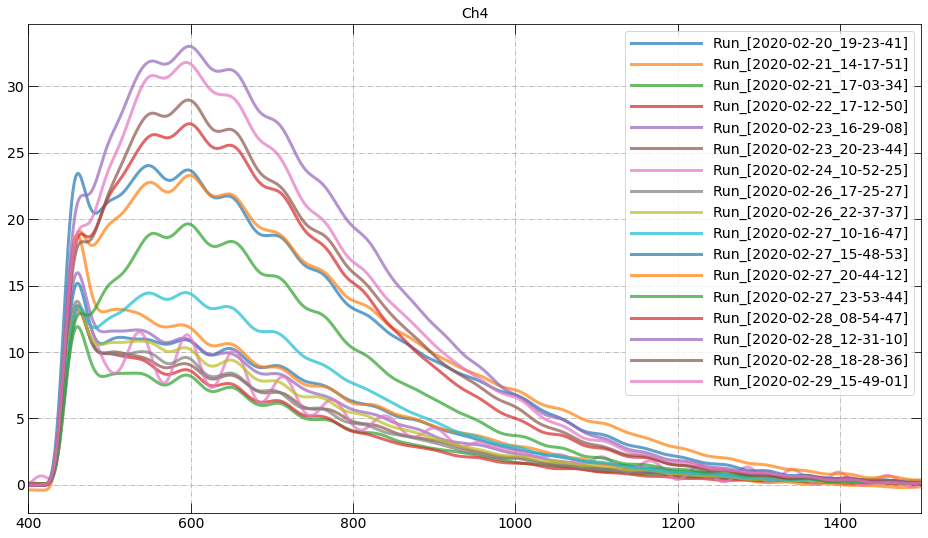

2020-02-20_19-23-41.pkl :  4015
2020-02-21_14-17-51.pkl :  4423
2020-02-21_17-03-34.pkl :  2887
2020-02-22_17-12-50.pkl :  2875
2020-02-23_16-29-08.pkl :  3857
2020-02-23_20-23-44.pkl :  3381
2020-02-24_10-52-25.pkl :  3426
2020-02-26_17-25-27.pkl :  3219
2020-02-26_22-37-37.pkl :  3465
2020-02-27_10-16-47.pkl :  4555
2020-02-27_15-48-53.pkl :  8123
2020-02-27_20-44-12.pkl :  8348
2020-02-27_23-53-44.pkl :  6188
2020-02-28_08-54-47.pkl :  8728
2020-02-28_12-31-10.pkl :  11384
2020-02-28_18-28-36.pkl :  9423
2020-02-29_15-49-01.pkl :  10189


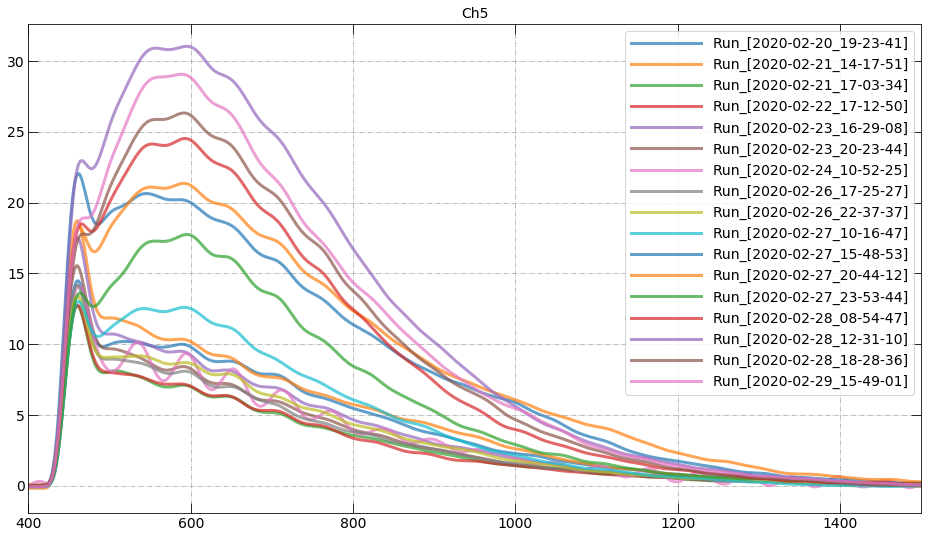

2020-02-20_19-23-41.pkl :  4515
2020-02-21_14-17-51.pkl :  4734
2020-02-21_17-03-34.pkl :  3178
2020-02-22_17-12-50.pkl :  3557
2020-02-23_16-29-08.pkl :  4332
2020-02-23_20-23-44.pkl :  3614
2020-02-24_10-52-25.pkl :  3762
2020-02-26_17-25-27.pkl :  3739
2020-02-26_22-37-37.pkl :  4062
2020-02-27_10-16-47.pkl :  5255
2020-02-27_15-48-53.pkl :  9164
2020-02-27_20-44-12.pkl :  9298
2020-02-27_23-53-44.pkl :  6940
2020-02-28_08-54-47.pkl :  9971
2020-02-28_12-31-10.pkl :  12415
2020-02-28_18-28-36.pkl :  10300
2020-02-29_15-49-01.pkl :  11159


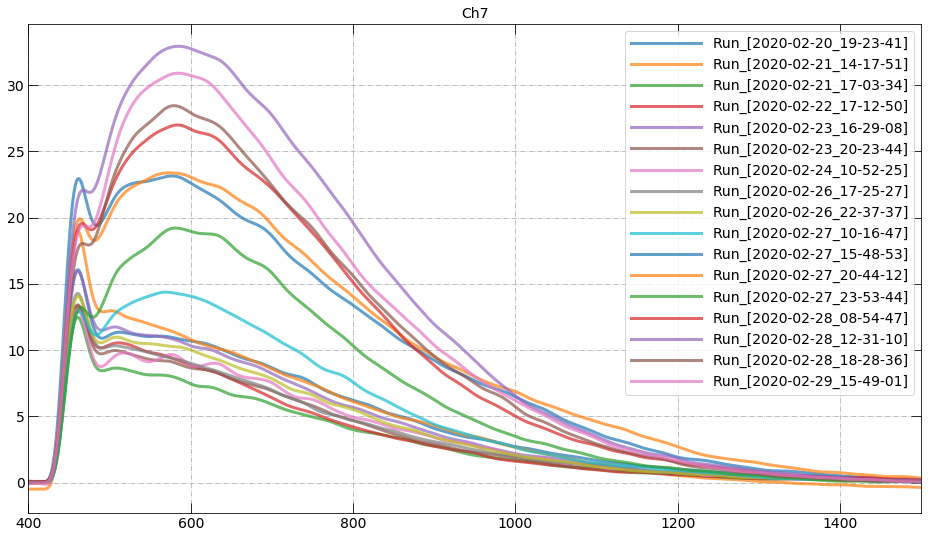

In [12]:
if not os.path.exists('channel'):
    os.makedirs('channel')
import scipy.integrate as integrate

#channels = ['Ch5','Ch7']
channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']

for ch in channels:
    Run=[]
    for filename in sorted(os.listdir(dirname)):
        #print(filename)
        if '.pkl' in filename:
            Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[ch], zi=zi*mydata[ch][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[ch])
            result_simps = integrate.simps(mydata[ch][400:1000])
            print(filename , ': ',int(result_simps))
            t=range(1, len(y) + 1)

        
        plt.grid(True)
        plt.title(ch)
        plt.plot(z2,linewidth=3,alpha=0.7)
        plt.legend(Run)
        plt.xlim(400, 1500)
        
        #plt.ylim(20, 60) 
    
    plot_path = os.path.abspath('channel') 
    plot_name = ch +'.png'
    plt.savefig(os.path.join(plot_path, plot_name))
    
    plt.show()





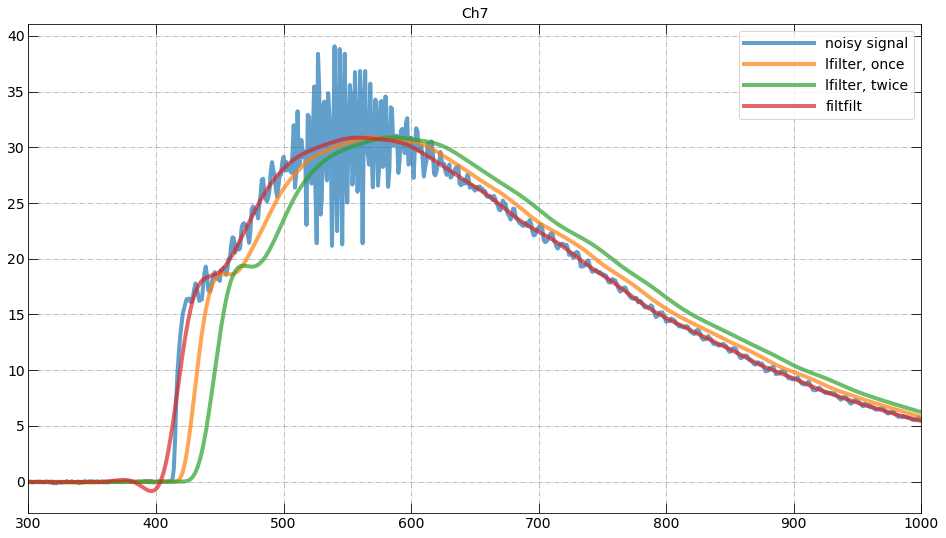

In [6]:
channels = ['Ch7']
#channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']

for ch in channels:
    for filename in sorted(os.listdir(dirname)):
        if '10-16-47' in filename:
            continue
            Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
                
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[ch], zi=zi*mydata[ch][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[ch])
            t=range(1, len(y) + 1)
    plt.grid(True)
    plt.title(ch)    
    plt.plot(t, mydata[ch],t,z,t,z2,t,y, linewidth=4,alpha=0.7)
    #plt.legend(str(os.path.splitext(filename)[0]))
    plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
    plt.xlim(300, 1000)

    plt.show()

In [7]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


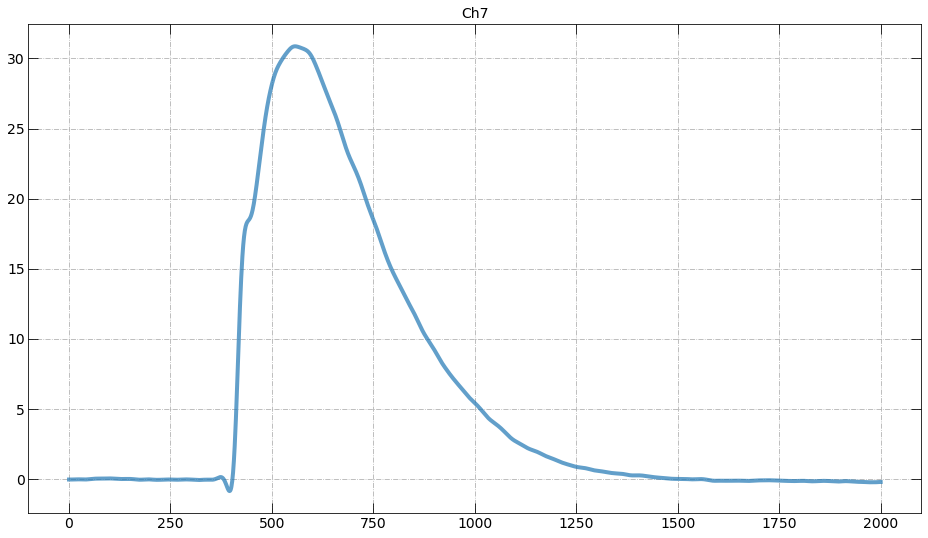

In [8]:
channels = ['Ch7']
#channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']

for ch in channels:
    for filename in sorted(os.listdir(dirname)):
        if '10-16-47' in filename:
            continue
            Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
                
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[ch], zi=zi*mydata[ch][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[ch])
            t=range(1, len(y) + 1)
    plt.grid(True)
    plt.title(ch)    
    plt.plot(t, y, linewidth=4,alpha=0.7)
    #plt.legend(str(os.path.splitext(filename)[0]))
    #plt.yscale('log')

    plt.show()

In [ ]:
def model(t, coeffs):
    #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
    #return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )
    return (coeffs[0]*np.exp(-t*coeffs[1]))

#x0 = np.array([365, 5,1 , 600, 10], dtype=float)
x0 = np.array([3675, 0.00433,], dtype=float)
print(x0)
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

In [ ]:
def func(x, a, b, c, d, e, f, g, z):
    #return a + b*np.exp(-x/c)
    return (z + a*np.exp(-(x-a)/b)+c*np.exp(-(x-a)/d)+e*np.exp(-(x-a)/f))
    #return (a*np.power(x-b/c)*(d*np.exp(-(x-b)/e)+f*np.exp(-(x-

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func,  y, t, p0=(0.1 ,0.1 ,10000 ,100 ,0.1 ,100 ,1,10000 ))
popt
#[335.32882701, 822.15743957, 246.29549506]

In [ ]:
plt.plot(t[200:2000:1],y[200:2000:1], t[200:2000:1], func(t[200:2000:1], *popt), 'r-', label='fit')
plt.yscale('log')